In [1]:
## This makes figures in a separate python window
#%matplotlib
## This makes static figures as .png files in the notebook: recommended
%matplotlib inline
## This makes figures "live" in the notebook
#%matplotlib notebook

In [2]:
## Standard imports for working in python
import matplotlib.pyplot as plt
import numpy as np
## It is highly recommended that you do NOT import * from any library
## Otherwise you can run into bad function name overlaps
## For instance, both numpy and python define "sum"

The matplotlib example gallery has good examples of how to do almost everything needed in matplotlib. When in doubt, you can take a look through here.

https://matplotlib.org/stable/gallery/index.html

A somewhat advanced but useful set of cheat sheets:

https://github.com/rougier/matplotlib-cheatsheet

# Basic Plotting

https://matplotlib.org/gallery/pyplots/pyplot_formatstr.html#sphx-glr-gallery-pyplots-pyplot-formatstr-py

* plot a line https://matplotlib.org/gallery/lines_bars_and_markers/simple_plot.html#sphx-glr-gallery-lines-bars-and-markers-simple-plot-py
* plot a scatterplot with plt.plot: `plt.plot(x, y, 'o')`
* plot a scatterplot with plt.scatter: `plt.scatter(x, y)`
* plot errorbars: `plt.errorbar(x, y, fmt='o', yerr=y_err)` https://matplotlib.org/gallery/statistics/errorbar.html#sphx-glr-gallery-statistics-errorbar-py https://matplotlib.org/gallery/statistics/errorbar_features.html#sphx-glr-gallery-statistics-errorbar-features-py

* Get the current figure or axis: `fig = plt.gcf()` and `ax = plt.gca()`

* colors, line styles, markers, marker styles: https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot


* axis labels: `plt.xlabel('my label')` or `ax.set_xlabel('my label')`
* axis limits: `plt.xlim(xmin, xmax)` or `ax.set_xlim(xmin, xmax)`
* axis titles: `plt.title('my title')` or `ax.set_title('my title')`
* axis tick marks: see `matplotlib.ticker.MultipleLocator` https://matplotlib.org/api/ticker_api.html, e.g. `ax.xaxis.set_major_locator(MultipleLocator(1))` or `ax.yaxis.set_minor_locator(MultipleLocator(0.1))`
* inverting axes: set the axis limits in the reverse direction, or `ax.invert_xaxis()` https://matplotlib.org/gallery/subplots_axes_and_figures/invert_axes.html#sphx-glr-gallery-subplots-axes-and-figures-invert-axes-py
* axis fonts https://matplotlib.org/gallery/text_labels_and_annotations/fonts_demo_kw.html#sphx-glr-gallery-text-labels-and-annotations-fonts-demo-kw-py https://matplotlib.org/gallery/text_labels_and_annotations/text_fontdict.html#sphx-glr-gallery-text-labels-and-annotations-text-fontdict-py
* TeX in text: `plt.xlabel(r"$\sqrt{N}$")`
* legends https://matplotlib.org/gallery/text_labels_and_annotations/legend_demo.html#sphx-glr-gallery-text-labels-and-annotations-legend-demo-py https://matplotlib.org/gallery/recipes/transparent_legends.html#sphx-glr-gallery-recipes-transparent-legends-py
https://matplotlib.org/gallery/text_labels_and_annotations/custom_legends.html#sphx-glr-gallery-text-labels-and-annotations-custom-legends-py
* log scale: `ax.set_xscale('log')` https://matplotlib.org/2.0.0/examples/pylab_examples/log_demo.html



* annotating and labeling figures: `plt.text`, `plt.figtext`, `plt.annotate`


* figure of certain size: `fig = plt.figure(figsize=(8,11))` (in inches)
* multi-panel figures: `fig, axes = plt.subplots(4, 2, figsize=(8,11))`


* 1D histograms (`plt.hist`, `plt.step` and `np.histogram`)

* saving figures `fig = plt.gcf(); fig.savefig("myname.png", bbox_inches='tight', dpi=300)` (can also do .pdf, .eps, ...)

* string formatting (e.g. when printing numbers): https://pyformat.info/

One confusing thing about matplotlib is that there are always at least 2 ways to do the same thing:
The "pyplot" (or matlab-like) interface, and the "object-oriented" interface.

The pyplot interface is usually better for making quick/interactive plots, while the object-oriented interface is usually better for making scripted plots.
https://matplotlib.org/gallery/misc/pythonic_matplotlib.html#sphx-glr-gallery-misc-pythonic-matplotlib-py

I usually default to the object-oriented interface, meaning I start making every plot with something like:

`fig, ax = plt.subplots(figsize=(8,8))`

# Example

Here we generate a bunch of random data from a line to make a scatterplot, then also plot some lines.

I've used the "object-oriented" interface (i.e. `ax.<stuff>` instead of `plt.<stuff>`)

In [3]:
def line_model(m, b, x):
    """
    Returns a line
    """
    return m*x + b

In [4]:
## Generate some data
m0 = 1
b0 = 0.5

np.random.seed(512)
xdata = np.random.uniform(-1, 1, size=100)
ydata = line_model(m0, b0, xdata)

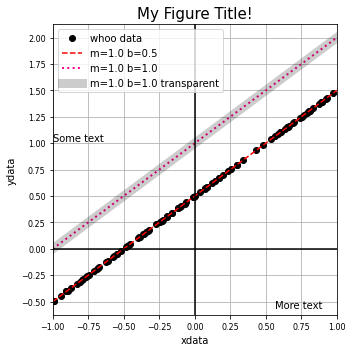

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
# Plot the data
ax.plot(xdata, ydata, 'ko', label="whoo data")
# The above is a common shorthand, which is short for this:
# ax.plot(xdata, ydata, marker='o', linestyle='none', color='black', label="whoo data")

# the quick colors are "rgbcmyk" for red/green/blue/cyan/magenta/yellow/black
# you can also specify colors using their hex codes, e.g. from here: https://xkcd.com/color/rgb/

# Plot a dashed line
xplot = np.linspace(-1, 1, 101) # evenly spaced points between -1 and 1 (inclusive)
yplot = line_model(m0, b0, xplot)
ax.plot(xplot, yplot, 'r--', label="m={:.1f} b={:.1f}".format(m0, b0))

# Plot a dotted line at a different point
m, b = m0, b0+0.5
yplot = line_model(m, b, xplot)
# #ff028d is hot pink from the XKCD site
ax.plot(xplot, yplot, ':', color="#ff028d", label="m={:.1f} b={:.1f}".format(m, b), lw=2)
# Here's also adding a transparent wide line
# Consider looking up ax.fill_between if you want to do fancier things
ax.plot(xplot, yplot, '-', color="k", label="m={:.1f} b={:.1f} transparent".format(m, b),
        lw=9, alpha=.2)

# Set axis limits
ax.set_xlim(-1, 1)

# Label your axes, with whatever fontsize you want
ax.set_xlabel("xdata", fontsize=10)
ax.set_ylabel("ydata", fontsize=10)
ax.set_title("My Figure Title!", fontsize=15)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)

# Add a legend
ax.legend(loc="upper left", fontsize=10)

# Set where you want the ticks to be
ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.25))
# I often like to draw a grid
ax.grid()

# You can add text this way at a specific coordinate
ax.text(-1.0, 1.0, "Some text", fontsize=10, ha='left', va='bottom')
# You can also add text relative to the axis coordinates
ax.text(0.95, 0.05, "More text", fontsize=10, ha='right', va='top',
       transform=ax.transAxes)

# You can draw horizontal and vertical lines, e.g. here to highlight y=0 and x=0
ax.axhline(0, color='k', ls='-') # y=0
ax.axvline(0, color='k', ls='-') # x=0

# This squeezes the margins of the figure
fig.tight_layout()
# You can save figures in different formats like this:
# fig.savefig("my_figure.png")
# fig.savefig("my_figure.pdf")


If you want to look up what something does, you can always use the `?`

In [6]:
?ax.tick_params

In [7]:
?ax.plot

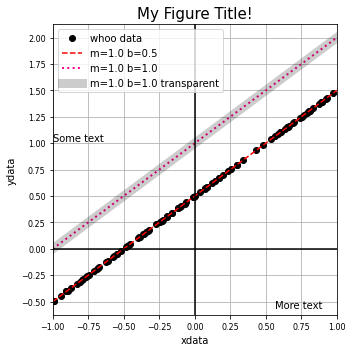

In [8]:
## The exact same thing but using the `plt` interface
plt.figure(figsize=(5,5))
# Plot the data
plt.plot(xdata, ydata, 'ko', label="whoo data")
# Plot a dashed line
xplot = np.linspace(-1, 1, 101) # evenly spaced points between -1 and 1 (inclusive)
yplot = line_model(m0, b0, xplot)
plt.plot(xplot, yplot, 'r--', label="m={:.1f} b={:.1f}".format(m0, b0))
# Plot a dotted line at a different point
m, b = m0, b0+0.5
yplot = line_model(m, b, xplot)
plt.plot(xplot, yplot, ':', color="#ff028d", label="m={:.1f} b={:.1f}".format(m, b), lw=2)
# Here's also adding a transparent wide line
plt.plot(xplot, yplot, '-', color="k", label="m={:.1f} b={:.1f} transparent".format(m, b),
        lw=9, alpha=.2)

# Set axis limits: DIFFERENT! No "set_"
plt.xlim(-1, 1)

# Label your axes, with whatever fontsize you want
# DIFFERENT!
plt.xlabel("xdata", fontsize=10)
plt.ylabel("ydata", fontsize=10)
plt.title("My Figure Title!", fontsize=15)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Add a legend
plt.legend(loc="upper left", fontsize=10)

# Set where you want the ticks to be. Have to get the axis with plt.gca()
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.25))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.25))
plt.grid()

# You can add text this way at a specific coordinate
plt.text(-1.0, 1.0, "Some text", fontsize=10, ha='left', va='bottom')
# You can also add text relative to the axis coordinates
plt.text(0.95, 0.05, "More text", fontsize=10, ha='right', va='top',
       transform=plt.gca().transAxes)

# You can draw horizontal and vertical lines, e.g. here to highlight y=0 and x=0
plt.axhline(0, color='k', ls='-') # y=0
plt.axvline(0, color='k', ls='-') # x=0

# This squeezes the margins of the figure
fig = plt.gcf() # gcf = get current figure, gca = get current axis
fig.tight_layout()
